In [183]:
import lmfit 
from lmfit.lineshapes import gaussian, lorentzian
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [184]:
def deriv(y, t, N, beta, gamma):
    S, I, _ = y
    dsdt = -beta * ((S * I) / N) 
    didt = beta * ((S * I) / N) - gamma * I
    drdt = gamma * I
    return dsdt, didt, drdt

def ODESolver(S0, I0, R0, beta, gamma):
    N = S0 + I0 + R0
    y0 = S0, I0, R0
    ret = odeint(deriv, y0, time_steps, args=(N, beta, gamma))
    return ret

In [185]:
data = pd.read_csv("..\\Datasets\\belgium_provinces_active_cases.csv")
res = {1: {"active": [], "recovered": [], "total": []}, 2: {"active": [], "recovered": [], "total": []}, 3: {"active": [], "recovered": [], "total": []}, 4: {"active": [], "recovered": [], "total": []}, 5: {"active": [], "recovered": [], "total": []}}
for entry in data.itertuples():
    if entry[1] in ["Antwerp", "Liege", "Limburg", "East_Flanders", "West_Flanders"]:
        res[1]["active"].append(entry[2:])
    if entry[1] in ["Hainaut"]:
        res[2]["active"].append(entry[2:])
    if entry[1] in ["Walloon_Brabant", "Flemish_Brabant"]:
        res[3]["active"].append(entry[2:])
    if entry[1] in ["Luxembourg", "Namur"]:
        res[4]["active"].append(entry[2:])
    if entry[1] in ["Brussels"]:
        res[5]["active"].append(entry[2:])
        
data = pd.read_csv("..\\Datasets\\belgium_provinces_recovered_cases.csv")
for entry in data.itertuples():
    if entry[1] in ["Antwerp", "Liege", "Limburg", "East_Flanders", "West_Flanders"]:
        res[1]["recovered"].append(entry[2:])
    if entry[1] in ["Hainaut"]:
        res[2]["recovered"].append(entry[2:])
    if entry[1] in ["Walloon_Brabant", "Flemish_Brabant"]:
        res[3]["recovered"].append(entry[2:])
    if entry[1] in ["Luxembourg", "Namur"]:
        res[4]["recovered"].append(entry[2:])
    if entry[1] in ["Brussels"]:
        res[5]["recovered"].append(entry[2:])

data = pd.read_csv("..\\Datasets\\belgium_provinces_total_cases.csv")
for entry in data.itertuples():
    if entry[1] in ["Antwerp", "Liege", "Limburg", "East_Flanders", "West_Flanders"]:
        res[1]["total"].append(entry[2:])
    if entry[1] in ["Hainaut"]:
        res[2]["total"].append(entry[2:])
    if entry[1] in ["Walloon_Brabant", "Flemish_Brabant"]:
        res[3]["total"].append(entry[2:])
    if entry[1] in ["Luxembourg", "Namur"]:
        res[4]["total"].append(entry[2:])
    if entry[1] in ["Brussels"]:
        res[5]["total"].append(entry[2:])
        
for key in res:
    res[key]["active"] = list(map(sum, zip(*res[key]["active"])))
    res[key]["recovered"] = list(map(sum, zip(*res[key]["recovered"])))
    res[key]["total"] = list(map(sum, zip(*res[key]["total"])))

In [186]:
pd_sum = pd.DataFrame(data=res, dtype=np.double)
with open('..\\Datasets\\belgium_provinces_summed_data.csv', 'w+', newline='') as f:
    pd_sum.to_csv(f, index=False)

In [187]:
for key in res:
    values = np.array(res[key]["active"])
    avg = np.average(values)
    std = np.std(values)
    values = (values - avg) / std
    res[key]["standardized"] = list(values)
    print(values)

[ 3.54634642  3.58746983  3.64397851  3.68035756  3.69516673  3.37822675
  3.42395896  3.46076162  3.49010885  3.51847333  2.51648213  2.51300858
  2.5172785   2.53525622  2.55365755  0.8031763   0.79575477  0.78082699
  0.76281537  0.76647531  0.17671788  0.17171936  0.1645181   0.1622137
  0.15868932 -0.24974896 -0.25096894 -0.24613986 -0.24205633 -0.26364315
 -0.34805881 -0.32132097 -0.33328353 -0.32552312 -0.30657958 -0.35009211
 -0.34489026 -0.34153532 -0.34412777 -0.34949906 -0.34633051 -0.34236559
 -0.34046784 -0.34131505 -0.34734716 -0.36349492 -0.39060553 -0.39365547
 -0.38811474 -0.38550534 -0.392283   -0.41542868 -0.43069534 -0.44608061
 -0.4407771  -0.43147477 -0.4322542  -0.43637163 -0.44042127 -0.44333566
 -0.45248549 -0.45228216 -0.44287817 -0.43972656 -0.43820159 -0.43710022
 -0.43928602 -0.44692782 -0.44835113 -0.43649023 -0.42942453 -0.42391769
 -0.41659782 -0.41888528 -0.42637459 -0.42630681 -0.41259901 -0.40632968
 -0.40189032 -0.39584126 -0.39580738 -0.40487249 -0.

In [188]:
def f(x, beta, gamma):
    _, I, _= ODESolver(S0, I0, R0, beta, gamma).T
    return I

time_steps = np.linspace(0, 61, 61)

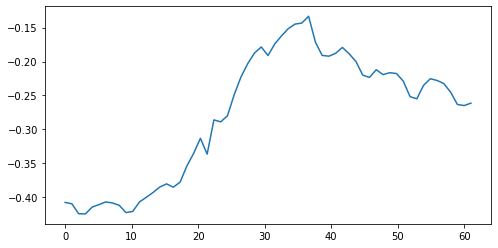

In [189]:
stan = np.array(res[1]["standardized"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, stan[107:168])

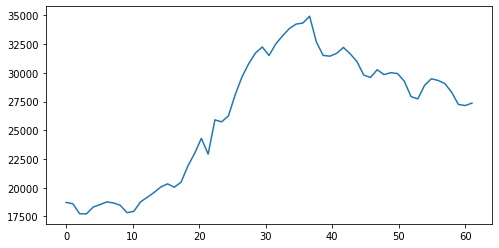

In [190]:
# Cluster 1
np.random.seed(42)
active1 = np.array(res[1]["active"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, active1[107:168])
recovered1 = res[1]["recovered"]
# plt.plot(x, recovered[107:174])
total1 = res[1]["total"]
# plt.plot(x, total[107:174])

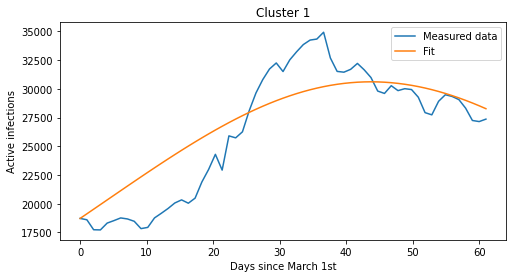

{'beta': 0.36445865321231996, 'gamma': 0.3217031979698217}

In [191]:
pop = 1869730 + 1200945 + 1525255 + 877370 + 1109800 
S0 = round((pop - total1[107]))
I0 = round(active1[107])
R0 = round(recovered1[107])

mod = lmfit.Model(f)
mod.set_param_hint("beta", value=0.05, vary=True, min=0)
mod.set_param_hint("gamma", value=0.05, vary=True, min=0)
params = mod.make_params()
result = mod.fit(active1[107:168], params, method='leastsq', x=x)
plt.figure(figsize=(8, 4))
plt.plot(x, active1[107:168], label="Measured data")
plt.plot(x, result.best_fit, label="Fit")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 1")
plt.legend()
plt.show()
result.best_values

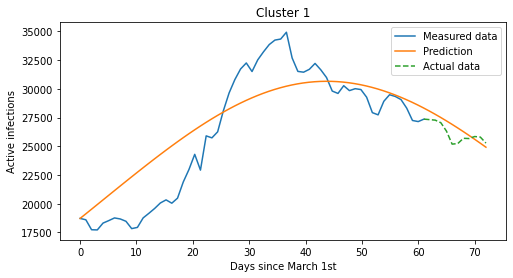

In [192]:
beta = 0.3645
gamma = 0.3217

time_steps = np.linspace(0, 72, 72)

_, I, _ = ODESolver(S0, I0, R0, beta, gamma).T

plt.figure(figsize=(8, 4))
plt.plot(x, active1[107:168], label="Measured data")
plt.plot(time_steps, I, label="Prediction")
plt.plot([*range(61, 73, 1)], active1[167:len(active1) - 1], '--', label="Actual data")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 1")
plt.legend()
plt.show()

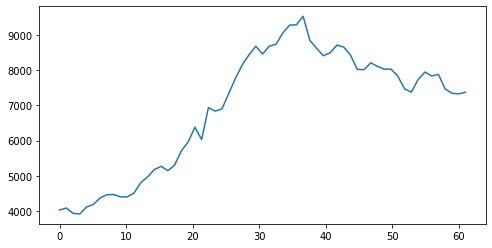

In [193]:
# Cluster 2
time_steps = np.linspace(0, 61, 61)
np.random.seed(42)
active2 = np.array(res[2]["active"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, active2[107:168])
recovered2 = res[2]["recovered"]
# plt.plot(x, recovered[107:174])
total2 = res[2]["total"]
# plt.plot(x, total[107:174])

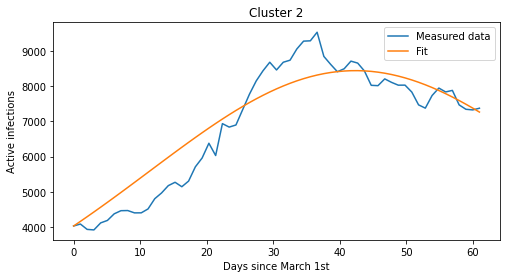

{'beta': 0.4138842268435794, 'gamma': 0.3466275476272873}

In [194]:
pop = 1346840
S0 = round((pop - total2[107]))
I0 = round(active2[107])
R0 = round(recovered2[107])

mod = lmfit.Model(f)
mod.set_param_hint("beta", value=0.05, vary=True, min=0)
mod.set_param_hint("gamma", value=0.05, vary=True, min=0)
params = mod.make_params()
result = mod.fit(active2[107:168], params, method='leastsq', x=x)
plt.figure(figsize=(8, 4))
plt.plot(x, active2[107:168], label="Measured data")
plt.plot(x, result.best_fit, label="Fit")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 2")
plt.legend()
plt.show()
result.best_values

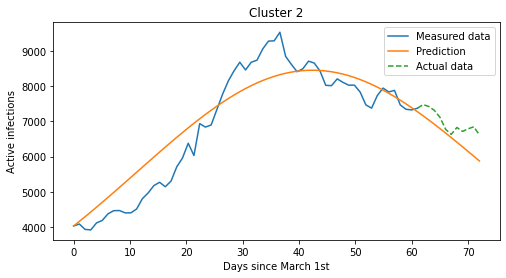

In [195]:
beta = 0.4139
gamma = 0.3466

time_steps = np.linspace(0, 72, 72)

_, I, _ = ODESolver(S0, I0, R0, beta, gamma).T

plt.figure(figsize=(8, 4))
plt.plot(x, active2[107:168], label="Measured data")
plt.plot(time_steps, I, label="Prediction")
plt.plot([*range(61, 73, 1)], active2[167:len(active2) - 1], '--', label="Actual data")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 2")
plt.legend()
plt.show()

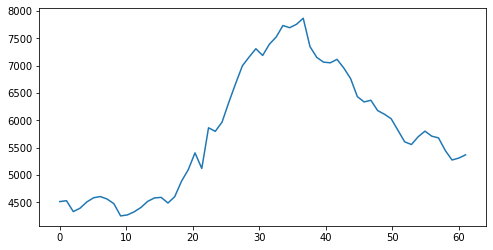

In [196]:
# Cluster 3
time_steps = np.linspace(0, 61, 61)
np.random.seed(42)
active3 = np.array(res[3]["active"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, active3[107:168])
recovered3 = res[3]["recovered"]
# plt.plot(x, recovered[107:174])
total3 = res[3]["total"]
# plt.plot(x, total[107:174])

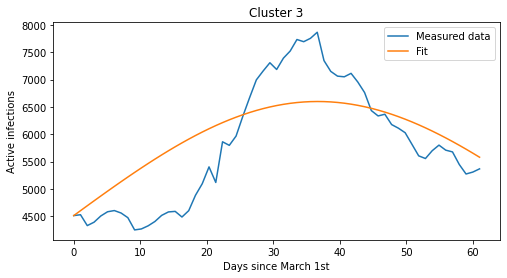

{'beta': 0.3957078129702083, 'gamma': 0.3534083167195603}

In [197]:
pop = 406019 + 1155843 
S0 = round((pop - total3[107]))
I0 = round(active3[107])
R0 = round(recovered3[107])

mod = lmfit.Model(f)
mod.set_param_hint("beta", value=0.05, vary=True, min=0)
mod.set_param_hint("gamma", value=0.05, vary=True, min=0)
params = mod.make_params()
result = mod.fit(active3[107:168], params, method='leastsq', x=x)
plt.figure(figsize=(8, 4))
plt.plot(x, active3[107:168], label="Measured data")
plt.plot(x, result.best_fit, label="Fit")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 3")
plt.legend()
plt.show()
result.best_values

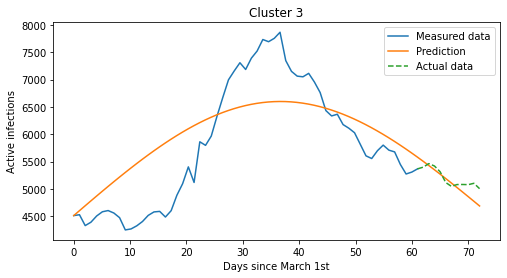

In [198]:
beta = 0.3957
gamma = 0.3534

time_steps = np.linspace(0, 72, 72)

_, I, _ = ODESolver(S0, I0, R0, beta, gamma).T

plt.figure(figsize=(8, 4))
plt.plot(x, active3[107:168], label="Measured data")
plt.plot(time_steps, I, label="Prediction")
plt.plot([*range(61, 73, 1)], active3[167:len(active3) - 1], '--', label="Actual data")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 3")
plt.legend()
plt.show()

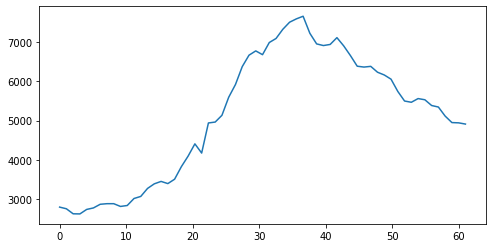

In [199]:
# Cluster 4
time_steps = np.linspace(0, 61, 61)
np.random.seed(42)
active4 = np.array(res[4]["active"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, active4[107:168])
recovered4 = res[4]["recovered"]
# plt.plot(x, recovered[107:174])
total4 = res[4]["total"]
# plt.plot(x, total[107:174])

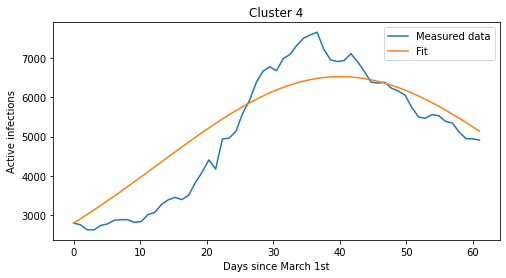

{'beta': 0.4100352955969502, 'gamma': 0.3397286950508176}

In [200]:
pop = 286752 + 495832
S0 = round((pop - total4[107]))
I0 = round(active4[107])
R0 = round(recovered4[107])

mod = lmfit.Model(f)
mod.set_param_hint("beta", value=0.05, vary=True, min=0)
mod.set_param_hint("gamma", value=0.05, vary=True, min=0)
params = mod.make_params()
result = mod.fit(active4[107:168], params, method='leastsq', x=x)
plt.figure(figsize=(8, 4))
plt.plot(x, active4[107:168], label="Measured data")
plt.plot(x, result.best_fit, label="Fit")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 4")
plt.legend()
plt.show()
result.best_values

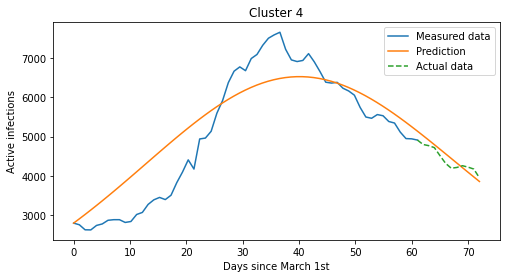

In [201]:
beta = 0.4100
gamma = 0.3397

time_steps = np.linspace(0, 72, 72)

_, I, _ = ODESolver(S0, I0, R0, beta, gamma).T

plt.figure(figsize=(8, 4))
plt.plot(x, active4[107:168], label="Measured data")
plt.plot(time_steps, I, label="Prediction")
plt.plot([*range(61, 73, 1)], active4[167:len(active4) - 1], '--', label="Actual data")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 4")
plt.legend()
plt.show()

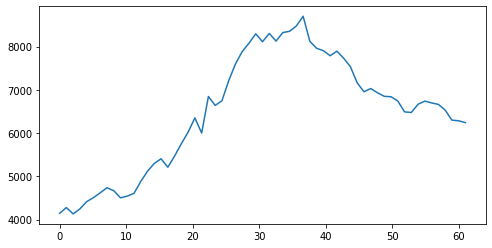

In [202]:
# Cluster 5
time_steps = np.linspace(0, 61, 61)
np.random.seed(42)
active5 = np.array(res[5]["active"])
x = np.linspace(0, 61, 61)
plt.figure(figsize=(8, 4))
plt.plot(x, active5[107:168])
recovered5 = res[5]["recovered"]
# plt.plot(x, recovered[107:174])
total5 = res[5]["total"]
# plt.plot(x, total[107:174])

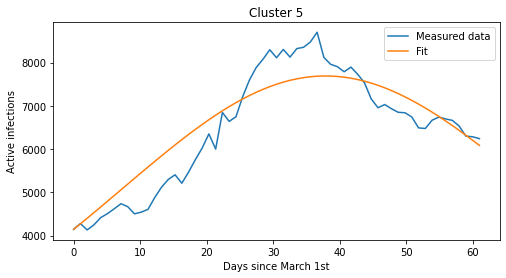

{'beta': 0.4157525893148477, 'gamma': 0.3532553503183433}

In [203]:
pop = 1218255 
S0 = round((pop - total5[107]))
I0 = round(active5[107])
R0 = round(recovered5[107])

mod = lmfit.Model(f)
mod.set_param_hint("beta", value=0.05, vary=True, min=0)
mod.set_param_hint("gamma", value=0.05, vary=True, min=0)
params = mod.make_params()
result = mod.fit(active5[107:168], params, method='leastsq', x=x)
plt.figure(figsize=(8, 4))
plt.plot(x, active5[107:168], label="Measured data")
plt.plot(x, result.best_fit, label="Fit")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 5")
plt.legend()
plt.show()
result.best_values

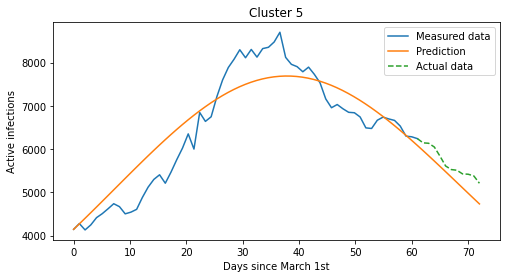

In [204]:
beta = 0.4158
gamma = 0.3533

time_steps = np.linspace(0, 72, 72)

_, I, _ = ODESolver(S0, I0, R0, beta, gamma).T

plt.figure(figsize=(8, 4))
plt.plot(x, active5[107:168], label="Measured data")
plt.plot(time_steps, I, label="Prediction")
plt.plot([*range(61, 73, 1)], active5[167:len(active5) - 1], '--', label="Actual data")
plt.xlabel("Days since March 1st")
plt.ylabel("Active infections")
plt.title("Cluster 5")
plt.legend()
plt.show()